<a href="https://colab.research.google.com/github/Mallickbanani/bm_project/blob/project-work/Loan_Approval_terms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data Brio 2/DBA_PROJECTFILES_MARCH23_data fiels/loan_prediction_train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


### missing values

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.isnull().sum()*100/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<Axes: >

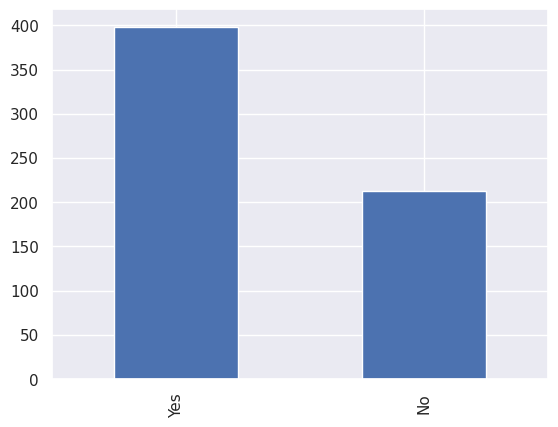

In [ ]:
df['Married'].value_counts().plot.bar()

<Axes: >

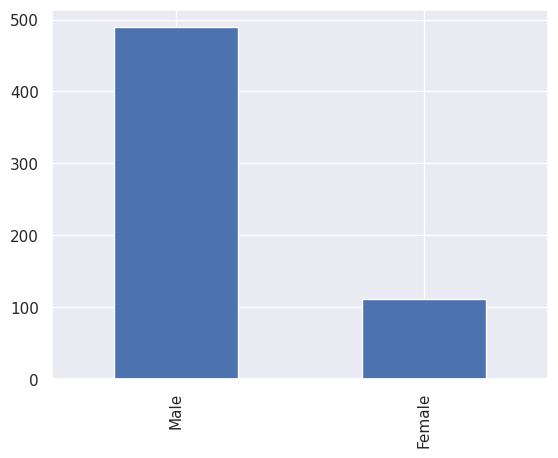

In [ ]:
df['Gender'].value_counts().plot.bar()

<Axes: >

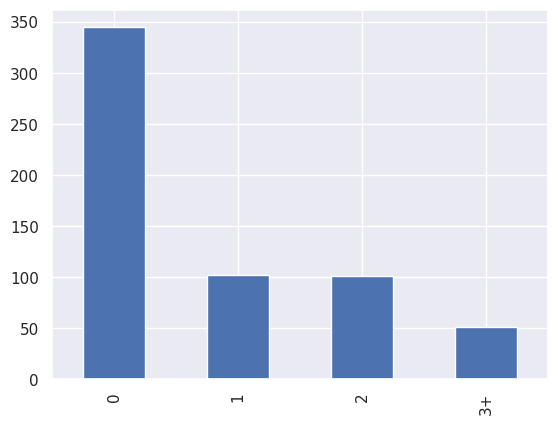

In [ ]:
df['Dependents'].value_counts().plot.bar()

In [ ]:
pd.crosstab(df['Credit_History'],df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [ ]:
pd.crosstab(df['Self_Employed'],df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


In [ ]:
pd.crosstab(df['Education'],df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

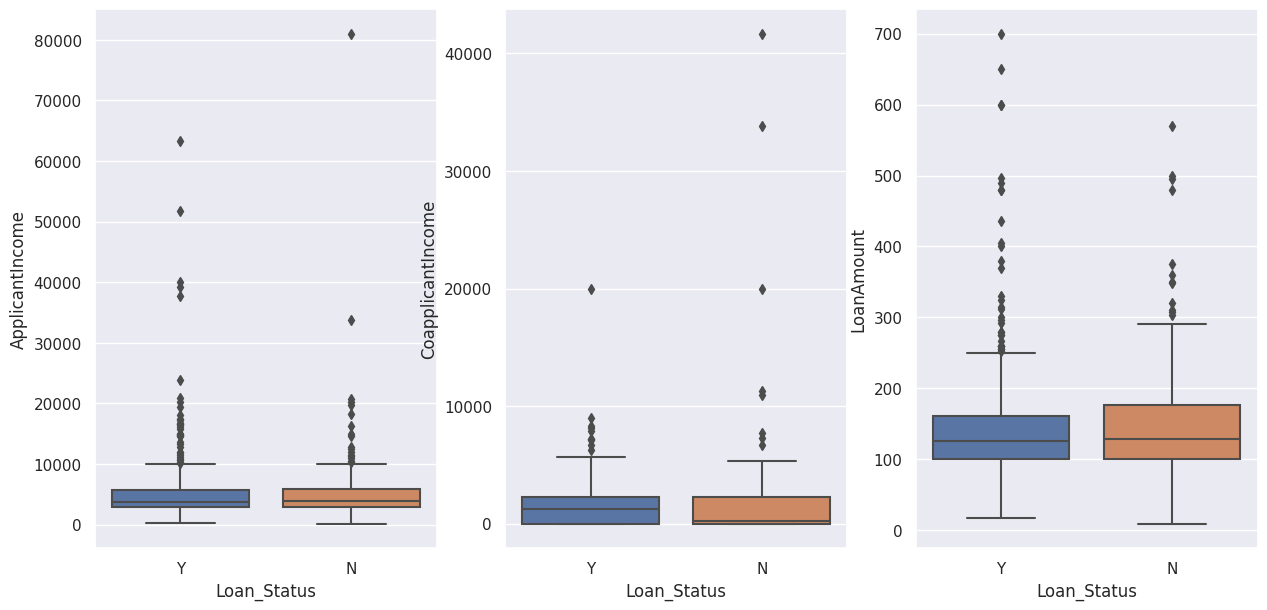

In [ ]:
fig,axes=plt.subplots(1,3, figsize=(15,7))
sns.boxplot(data=df,x="Loan_Status",y='ApplicantIncome',ax=axes[0])
sns.boxplot(data=df,y='CoapplicantIncome',x="Loan_Status",ax=axes[1])
sns.boxplot(data=df,y='LoanAmount',x="Loan_Status",ax=axes[2])

In [ ]:
df["Total_income"]= df['ApplicantIncome'] + df['CoapplicantIncome']

<ipython-input-17-1beeb4c8056e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_income'],ax=axes[0])
<ipython-input-17-1beeb4c8056e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'],ax=axes[1])


<Axes: xlabel='LoanAmount', ylabel='Density'>

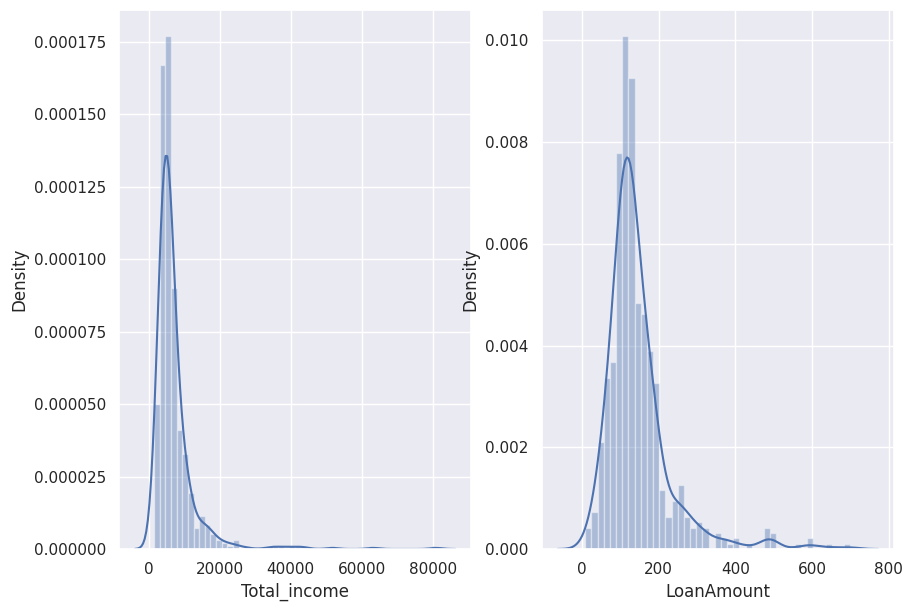

In [ ]:
fig,axes=plt.subplots(1,2, figsize=(10,7))
sns.distplot(df['Total_income'],ax=axes[0])
sns.distplot(df['LoanAmount'],ax=axes[1])

<ipython-input-18-97c43a222d2e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["LoanAmount_log"])


<Axes: xlabel='LoanAmount_log', ylabel='Density'>

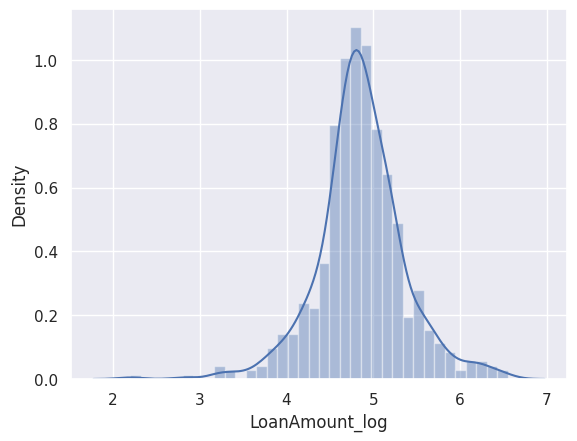

In [ ]:
df["LoanAmount_log"]=np.log(df["LoanAmount"])
sns.distplot(df["LoanAmount_log"])


<ipython-input-19-5f6e30e6159f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Total_income_log"])


<Axes: xlabel='Total_income_log', ylabel='Density'>

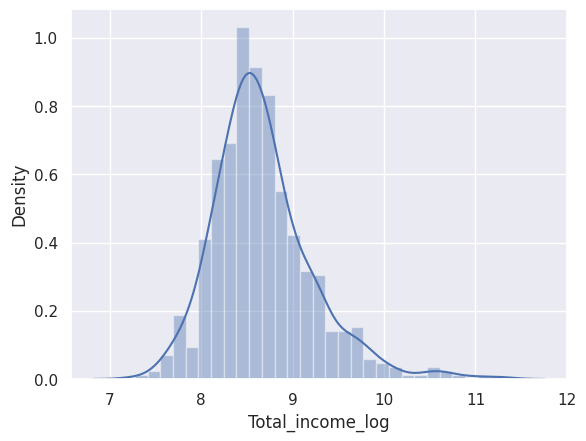

In [ ]:
df["Total_income_log"]=np.log(df["Total_income"])
sns.distplot(df["Total_income_log"])

### fill the missing values

In [ ]:
# numerical terms
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['LoanAmount_log']=df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
# categorical terms
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_income         0
LoanAmount_log       0
Total_income_log     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Total_income       614 non-null    float64
 14  LoanAmount_log     614 non-null    float64
 15  Total_income_log   614 non-null    float64
dtypes: float64(7), int64(1), o

 convert categorical values into numerical values

In [ ]:
# numeric features
num_data=df.select_dtypes(include=['int64','float64'])
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,LoanAmount_log,Total_income_log
0,5849,0.0,146.412162,360.0,1.0,5849.0,4.857444,8.674026
1,4583,1508.0,128.000000,360.0,1.0,6091.0,4.852030,8.714568
2,3000,0.0,66.000000,360.0,1.0,3000.0,4.189655,8.006368
3,2583,2358.0,120.000000,360.0,1.0,4941.0,4.787492,8.505323
4,6000,0.0,141.000000,360.0,1.0,6000.0,4.948760,8.699515
...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,2900.0,4.262680,7.972466
610,4106,0.0,40.000000,180.0,1.0,4106.0,3.688879,8.320205
611,8072,240.0,253.000000,360.0,1.0,8312.0,5.533389,9.025456
612,7583,0.0,187.000000,360.0,1.0,7583.0,5.231109,8.933664


In [ ]:
# categorical data
cat_data=df.select_dtypes(include=['object'])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_data:
  df[i]=le.fit_transform(df[i])


In [ ]:
df=df.drop(['Loan_ID'],1)

<ipython-input-27-1f9830f8058c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(['Loan_ID'],1)


In [ ]:
df.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,LoanAmount_log,Total_income_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,4.857444,8.674026
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,4.852030,8.714568
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,4.189655,8.006368
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,4.787492,8.505323


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
 12  Total_income       614 non-null    float64
 13  LoanAmount_log     614 non-null    float64
 14  Total_income_log   614 non-null    float64
dtypes: float64(7), int64(8)
memory usage: 76.8 KB


In [ ]:
# correlation
corr_matrix=df.corr()
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Total_income_log     0.007240
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
Total_income        -0.031271
LoanAmount          -0.036416
LoanAmount_log      -0.038155
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

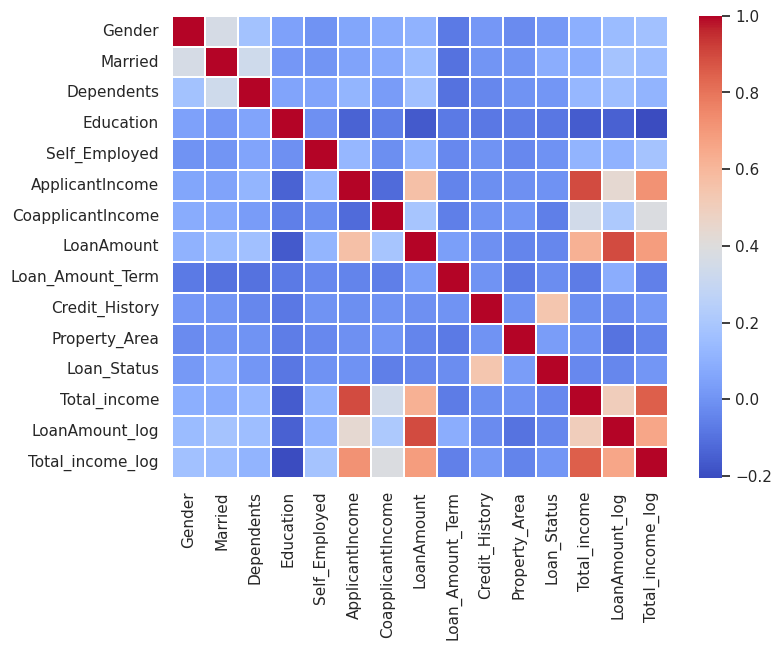

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm',linewidths=0.20)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
 12  Total_income       614 non-null    float64
 13  LoanAmount_log     614 non-null    float64
 14  Total_income_log   614 non-null    float64
dtypes: float64(7), int64(8)
memory usage: 76.8 KB


In [ ]:
# features & target values

y=df['Loan_Status']
x=df.drop('Loan_Status',1)

<ipython-input-33-23304017d51e>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=df.drop('Loan_Status',1)


In [ ]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income,LoanAmount_log,Total_income_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,5849.0,4.857444,8.674026
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,6091.0,4.852030,8.714568
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,3000.0,4.189655,8.006368
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,4941.0,4.787492,8.505323
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,6000.0,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,2900.0,4.262680,7.972466
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,4106.0,3.688879,8.320205
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,8312.0,5.533389,9.025456
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,7583.0,5.231109,8.933664


In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

feature scalling

In [ ]:
cols=['ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term','Total_income',	'LoanAmount_log',	'Total_income_log'	]

In [ ]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x[cols]=st.fit_transform(x[cols])

In [ ]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income,LoanAmount_log,Total_income_log
0,1,0,0,0,0,0.072991,-0.554487,0.000000,0.279851,1.0,2,-0.182184,0.000000,0.008468
1,1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.279851,1.0,0,-0.144684,-0.010924,0.082903
2,1,1,0,0,1,-0.393747,-0.554487,-0.957641,0.279851,1.0,2,-0.623656,-1.347462,-1.217363
3,1,1,0,1,0,-0.462062,0.251980,-0.314547,0.279851,1.0,2,-0.322885,-0.141150,-0.301273
4,1,0,0,0,0,0.097728,-0.554487,-0.064454,0.279851,1.0,2,-0.158785,0.184256,0.055266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.410130,-0.554487,-0.898095,0.279851,1.0,0,-0.639152,-1.200112,-1.279607
610,1,1,3,0,0,-0.212557,-0.554487,-1.267279,-2.518655,1.0,0,-0.452274,-2.357923,-0.641153
611,1,1,1,0,0,0.437174,-0.472404,1.269371,0.279851,1.0,2,0.199475,1.363919,0.653699
612,1,1,2,0,0,0.357064,-0.554487,0.483367,0.279851,1.0,2,0.086512,0.753978,0.485168


In [ ]:
x=df.drop(["Loan_Status",'ApplicantIncome','CoapplicantIncome',"LoanAmount",'Total_income'],1)

<ipython-input-39-8bbb09edc0c8>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=df.drop(["Loan_Status",'ApplicantIncome','CoapplicantIncome',"LoanAmount",'Total_income'],1)


In [ ]:
x

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_income_log
0,1,0,0,0,0,360.0,1.0,2,4.857444,8.674026
1,1,1,1,0,0,360.0,1.0,0,4.852030,8.714568
2,1,1,0,0,1,360.0,1.0,2,4.189655,8.006368
3,1,1,0,1,0,360.0,1.0,2,4.787492,8.505323
4,1,0,0,0,0,360.0,1.0,2,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,360.0,1.0,0,4.262680,7.972466
610,1,1,3,0,0,180.0,1.0,0,3.688879,8.320205
611,1,1,1,0,0,360.0,1.0,2,5.533389,9.025456
612,1,1,2,0,0,360.0,1.0,2,5.231109,8.933664


train - test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [ ]:
model_df={}
def model_var(model,x,y):
  x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(f'{model} accuracy score is : {metrics.accuracy_score(y_pred,y_test)}')
  score=cross_val_score(model,x,y,cv=5)
  print(f'{model} Avg cross val score is {np.mean(score)}')
  model_df[model]=round(np.mean(score)*100,2)

DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model_var(model,x,y)

DecisionTreeClassifier() accuracy score is : 0.6504065040650406
DecisionTreeClassifier() Avg cross val score is 0.698693855791017


LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model_var(model,x,y)


LogisticRegression() accuracy score is : 0.7886178861788617

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


LogisticRegression() Avg cross val score is 0.8078368652538984


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model_var(model,x,y)

GaussianNB() accuracy score is : 0.7804878048780488
GaussianNB() Avg cross val score is 0.8013461282153805


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model_var(model,x,y)

RandomForestClassifier() accuracy score is : 0.7560975609756098
RandomForestClassifier() Avg cross val score is 0.7720111955217913


In [ ]:
model_df

{DecisionTreeClassifier(): 69.87,
 LogisticRegression(): 80.78,
 GaussianNB(): 80.13,
 RandomForestClassifier(): 77.2}

from this result we can find out Logistic Regression is best model for this dataset